In [ ]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from glob import glob
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
base = MobileNetV2(input_shape = (128,128,3),include_top = False)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
x = base.output
x = Flatten()(x)
x = Dense(256,activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(1,activation='sigmoid')(x)


In [ ]:
model = Model(base.input,x)

In [ ]:
model.compile('adam','binary_crossentropy',['accuracy'])

In [ ]:
imgs = []
lbls = []


In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
for i in glob('/content/drive/MyDrive/Colab Notebooks/Dataset for Mask Detection/Test/WithMask/*'):
  img = load_img(i,target_size = (128,128,3))
  img = img_to_array(img)
  imgs.append(img)
  lbls.append(1)
for i in glob('/content/drive/MyDrive/Colab Notebooks/Dataset for Mask Detection/Test/WithoutMask/*'):
  img = load_img(i,target_size = (128,128,3))
  img = img_to_array(img)
  imgs.append(img)
  lbls.append(0)

In [ ]:
from sklearn.model_selection import train_test_split
imgs = np.array(imgs)
lbls = np.array(lbls)
trainx,testx,trainy,testy = train_test_split(imgs,lbls,stratify = lbls)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('chk',save_best_only=True)

In [ ]:
hist = model.fit(trainx,trainy,validation_data=(testx,testy),epochs = 10,batch_size = 128,callbacks=[mc])

Epoch 1/10
1/1 [==============================] - ETA: 0s - loss: 0.9840 - accuracy: 0.5545

1/1 [==============================] - 72s 72s/step - loss: 0.9840 - accuracy: 0.5545 - val_loss: 13.6269 - val_accuracy: 0.5946
Epoch 2/10
1/1 [==============================] - ETA: 0s - loss: 4.3007 - accuracy: 0.6182

1/1 [==============================] - 45s 45s/step - loss: 4.3007 - accuracy: 0.6182 - val_loss: 7.9880 - val_accuracy: 0.5946
Epoch 3/10
1/1 [==============================] - ETA: 0s - loss: 0.1738 - accuracy: 0.9727

1/1 [==============================] - 47s 47s/step - loss: 0.1738 - accuracy: 0.9727 - val_loss: 3.2898 - val_accuracy: 0.6216
Epoch 4/10
1/1 [==============================] - 12s 12s/step - loss: 1.9266 - accuracy: 0.7364 - val_loss: 3.5214 - val_accuracy: 0.6216
Epoch 5/10
1/1 [==============================] - 10s 10s/step - loss: 0.0835 - accuracy: 0.9636 - val_loss: 4.6639 - val_accuracy: 0.6486
Epoch 6/10
1/1 [==============================] - 10s 10s/step - loss: 1.3796e-04 - accuracy: 1.0000 - val_loss: 5.4583 - val_accuracy: 0.7027
Epoch 7/10
1/1 [==============================] - 10s 10s/step - loss: 1.4411e-04 - accuracy: 1.0000 - val_loss: 6.0231 - val_accuracy: 0.7027
Epoch 8/10
1/1 [==============================] - 11s 11s/step - loss: 9.2142e-05 - accuracy: 1.0000 - val_loss: 6.5596 - val_accuracy: 0.6757
Epoch 9/10
1/1 [==============================] - 10s 10s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 7.2016 - val_accuracy: 0.6757
Epoch 10/10
1/1 [=========

In [ ]:
valx = []
valy = []
for i in glob('/content/drive/MyDrive/Colab Notebooks/Dataset for Mask Detection/Validation/WithMask/*'):
  img = load_img(i,target_size=(128,128,3))
  img = img_to_array(img)
  valx.append(img)
  valy.append(1)
for i in glob('/content/drive/MyDrive/Colab Notebooks/Dataset for Mask Detection/Validation/WithoutMask/*'):
  img = load_img(i,target_size=(128,128,3))
  img = img_to_array(img)
  valx.append(img)
  valy.append(0)
valx = np.array(valx)
valy = np.array(valy)

In [ ]:
model.evaluate(valx,valy,steps = 30)

27/30 [==========================>...] - ETA: 0s - loss: 6.2829 - accuracy: 0.6852

30/30 [==============================] - 2s 78ms/step - loss: 6.3322 - accuracy: 0.6788


[6.332242965698242, 0.678787887096405]

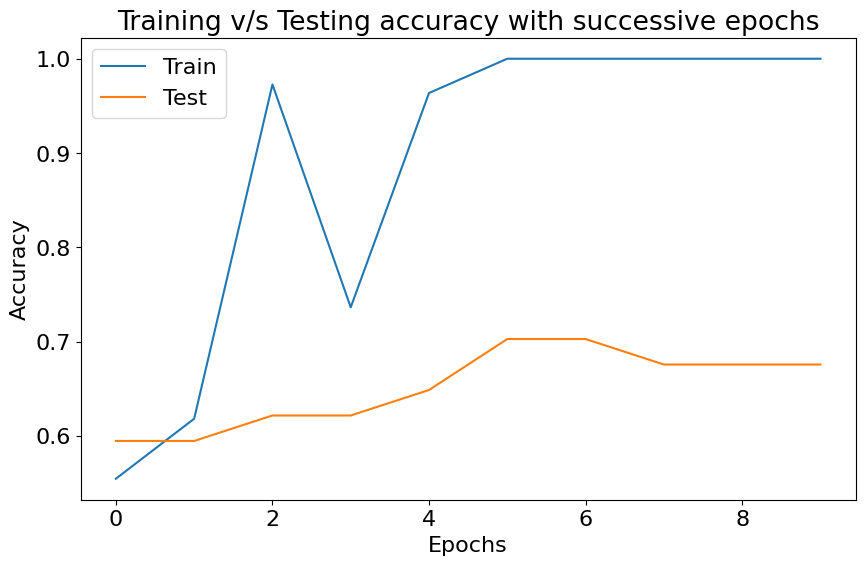

In [ ]:
import matplotlib as mpl
mpl.rcParams.update({'font.size':16})
plt.figure(figsize = (10,6))
plt.plot(hist.history['accuracy'],label = 'Train')
plt.plot(hist.history['val_accuracy'],label = 'Test')
plt.title('Training v/s Testing accuracy with successive epochs')
plt.xlabel('Epochs')
#plt.yticks((0.94,1))
plt.ylabel('Accuracy')
plt.legend()

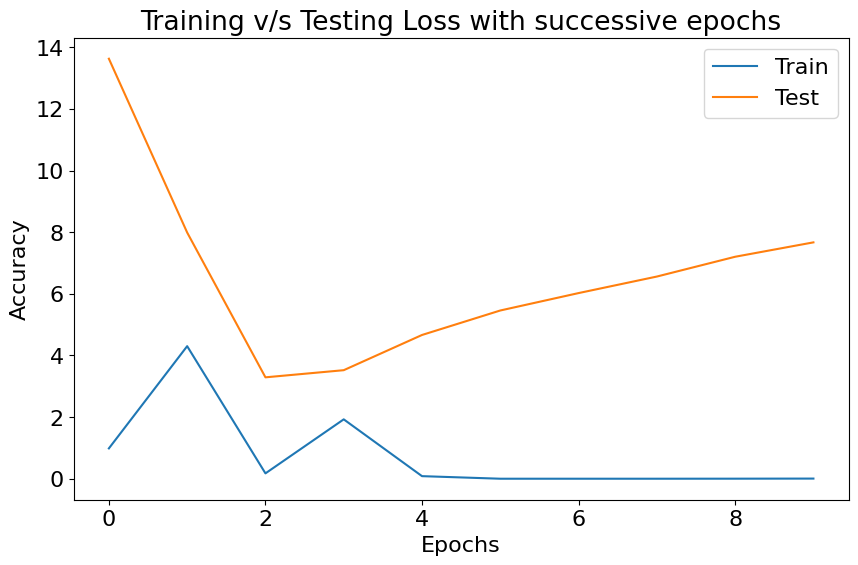

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(hist.history['loss'],label = 'Train')
plt.plot(hist.history['val_loss'],label = 'Test')
plt.title('Training v/s Testing Loss with successive epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
import seaborn as sn


In [ ]:
cm1 = confusion_matrix(trainy,model.predict(trainx).round())
cm2 = confusion_matrix(testy,model.predict(testx).round())
cm3 = confusion_matrix(valy,model.predict(valx).round())


6/6 [==============================] - 2s 278ms/step


Text(44.72222222222221, 0.5, 'True Labels')

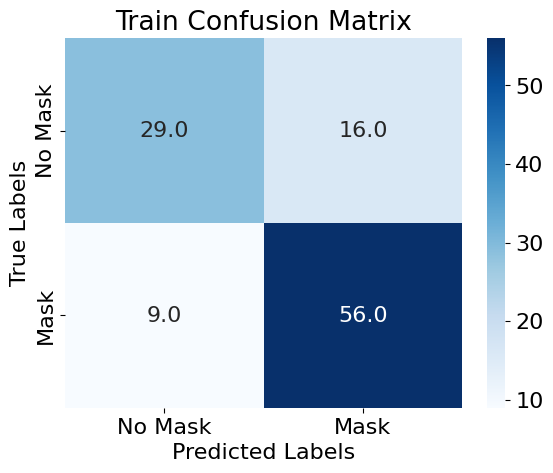

In [ ]:
sn.heatmap(cm1,annot=True,fmt = '.1f',xticklabels=['No Mask','Mask'],yticklabels=['No Mask','Mask'],cmap = 'Blues')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

Text(44.72222222222221, 0.5, 'True Labels')

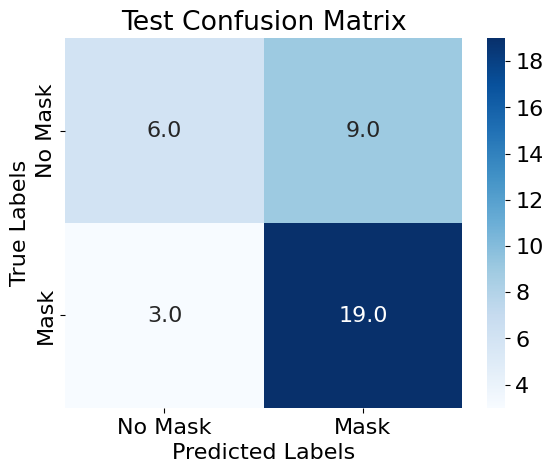

In [ ]:
sn.heatmap(cm2,annot=True,fmt = '.1f',xticklabels=['No Mask','Mask'],yticklabels=['No Mask','Mask'],cmap = 'Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

Text(44.72222222222221, 0.5, 'True Labels')

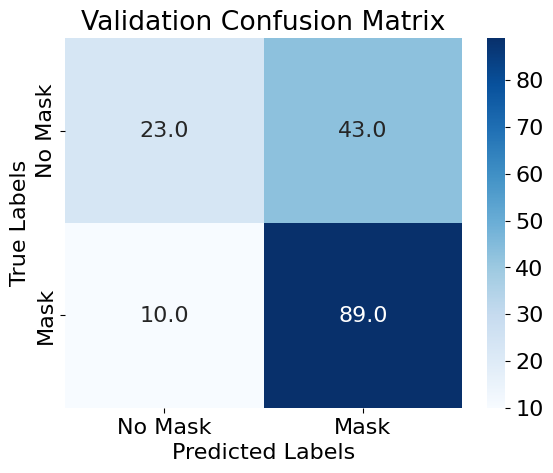

In [ ]:
sn.heatmap(cm3,annot=True,fmt = '.1f',xticklabels=['No Mask','Mask'],yticklabels=['No Mask','Mask'],cmap = 'Blues')
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [ ]:
print(classification_report(trainy,model.predict(trainx).round()))

4/4 [==============================] - 1s 278ms/step
              precision    recall  f1-score   support

           0       0.76      0.64      0.70        45
           1       0.78      0.86      0.82        65

    accuracy                           0.77       110
   macro avg       0.77      0.75      0.76       110
weighted avg       0.77      0.77      0.77       110



In [ ]:
print(classification_report(testy,model.predict(testx).round()))

2/2 [==============================] - 0s 91ms/step
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        15
           1       0.68      0.86      0.76        22

    accuracy                           0.68        37
   macro avg       0.67      0.63      0.63        37
weighted avg       0.67      0.68      0.65        37



In [ ]:
print(classification_report(valy,model.predict(valx).round()))

6/6 [==============================] - 2s 274ms/step
              precision    recall  f1-score   support

           0       0.70      0.35      0.46        66
           1       0.67      0.90      0.77        99

    accuracy                           0.68       165
   macro avg       0.69      0.62      0.62       165
weighted avg       0.68      0.68      0.65       165



In [ ]:
clf = cv2.CascadeClassifier('/content/haarcascade_frontalface_alt2.xml')

1/1 [==============================] - 0s 52ms/step


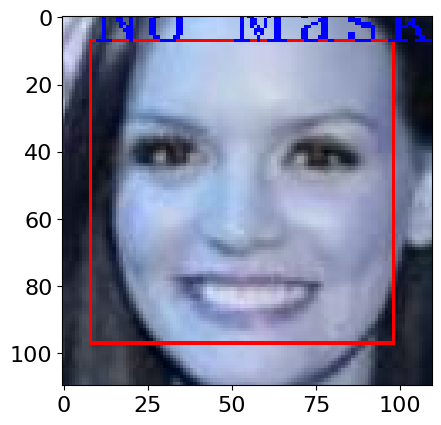

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Dataset for Mask Detection/Validation/WithoutMask/384.png')
boxes = clf.detectMultiScale(img,1.01,5)
for box in boxes:
  (x,y,w,h) = box
  im = img[y:y+h,x:x+w]
  im = cv2.resize(im,(128,128))
  pred = model.predict(np.array([im]))
  if pred.round()==0:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
    cv2.putText(img,'No Mask',(x,y),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,0,255),1)
  else:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
    cv2.putText(img,'Mask',(x,y),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,0,255),1)
plt.imshow(img)